<a href="https://colab.research.google.com/github/yug201/amd-stock-price-prediction-lstm/blob/main/amd_stock_price_prediction_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# from google.colab import drive
# drive.mount('/content/drive')


import pandas as pd

csv_file_path = '/content/drive/MyDrive/Copy of AMD.csv'

AMD = pd.read_csv(csv_file_path)

AMD
import pandas as pd
df1 = AMD.iloc[60500:]
df1


,date,open_AMD,low_AMD,high_AMD,close_AMD,volume_AMD,change_AMD,percent_change_AMD
60500,2023-11-17 13:18:00,121.2350,121.1400,121.235,121.1600,42137,-0.0750,-0.061863
60501,2023-11-17 13:19:00,121.1487,121.1100,121.170,121.1700,35891,0.0100,0.008254
60502,2023-11-17 13:20:00,121.1699,121.1699,121.220,121.1900,32827,0.0200,0.016506
60503,2023-11-17 13:21:00,121.1850,121.1500,121.240,121.2400,56249,0.0500,0.041258
60504,2023-11-17 13:22:00,121.2373,121.2201,121.330,121.3216,96894,0.0816,0.067305
...,...,...,...,...,...,...,...,...
120538,2024-07-02 15:55:00,164.1700,164.0301,164.290,164.0800,171499,-0.1050,-0.063952
120539,2024-07-02 15:56:00,164.0700,164.0700,164.250,164.1700,192251,0.0900,0.054851
120540,2024-07-02 15:57:00,164.1750,163.8700,164.190,164.0000,299113,-0.1700,-0.103551
120541,2024-07-02 15:58:00,164.0000,163.9700,164.150,164.1500,312518,0.1500,0.091463


In [2]:
# Calculate technical indicators for scalping and short-term analysis
def calculate_technical_indicators(df, symbol):
    # Simple Moving Averages
    df[f'sma_5_{symbol}'] = df[f'close_{symbol}'].rolling(window=5).mean()
    df[f'sma_21_{symbol}'] = df[f'close_{symbol}'].rolling(window=21).mean()

    # Exponential Moving Averages
    # df[f'ema_5_{symbol}'] = df[f'close_{symbol}'].ewm(span=5, adjust=False).mean()
    # df[f'ema_21_{symbol}'] = df[f'close_{symbol}'].ewm(span=21, adjust=False).mean()

    # # MACD (Moving Average Convergence Divergence)
    # ema_12 = df[f'close_{symbol}'].ewm(span=12, adjust=False).mean()
    # ema_26 = df[f'close_{symbol}'].ewm(span=26, adjust=False).mean()
    # df[f'macd_{symbol}'] = ema_12 - ema_26
    # df[f'macd_signal_{symbol}'] = df[f'macd_{symbol}'].ewm(span=9, adjust=False).mean()

    # # Relative Strength Index (RSI)
    # delta = df[f'close_{symbol}'].diff(1)
    # gain = delta.where(delta > 0, 0)
    # loss = -delta.where(delta < 0, 0)
    # avg_gain = gain.rolling(window=14).mean()
    # avg_loss = loss.rolling(window=14).mean()
    # rs = avg_gain / avg_loss
    # df[f'rsi_{symbol}'] = 100 - (100 / (1 + rs))

    # # Bollinger Bands
    # df[f'bb_middle_{symbol}'] = df[f'close_{symbol}'].rolling(window=20).mean()
    # df[f'bb_std_{symbol}'] = df[f'close_{symbol}'].rolling(window=20).std()
    # df[f'bb_upper_{symbol}'] = df[f'bb_middle_{symbol}'] + (df[f'bb_std_{symbol}'] * 2)
    # df[f'bb_lower_{symbol}'] = df[f'bb_middle_{symbol}'] - (df[f'bb_std_{symbol}'] * 2)

    # # Stochastic Oscillator
    # df[f'stoch_k_{symbol}'] = (df[f'close_{symbol}'] - df[f'low_{symbol}'].rolling(window=14).min()) / (df[f'high_{symbol}'].rolling(window=14).max() - df[f'low_{symbol}'].rolling(window=14).min()) * 100
    # df[f'stoch_d_{symbol}'] = df[f'stoch_k_{symbol}'].rolling(window=3).mean()

    # # Volume Weighted Average Price (VWAP)
    # df[f'vwap_{symbol}'] = (df[f'volume_{symbol}'] * (df[f'high_{symbol}'] + df[f'low_{symbol}'] + df[f'close_{symbol}']) / 3).cumsum() / df[f'volume_{symbol}'].cumsum()

    # # Average True Range (ATR)
    # df['tr0'] = abs(df[f'high_{symbol}'] - df[f'low_{symbol}'])
    # df['tr1'] = abs(df[f'high_{symbol}'] - df[f'close_{symbol}'].shift())
    # df['tr2'] = abs(df[f'low_{symbol}'] - df[f'close_{symbol}'].shift())
    # df['tr'] = df[['tr0', 'tr1', 'tr2']].max(axis=1)
    # df[f'atr_{symbol}'] = df['tr'].rolling(window=14).mean()

    return df

# Ensure the DataFrame is sorted by datetime
if df1 is not None:
    df1.sort_index(inplace=True)
    df1.reset_index(inplace=True)
    df1.rename(columns={'index': 'datetime'}, inplace=True)

    # Calculate technical indicators
    df1 = calculate_technical_indicators(df1, "AMD")

    print(df1.head())
else:
    print("No data was fetched for the symbol.")


   datetime                 date  open_AMD   low_AMD  high_AMD  close_AMD  \
0     60500  2023-11-17 13:18:00  121.2350  121.1400   121.235   121.1600   
1     60501  2023-11-17 13:19:00  121.1487  121.1100   121.170   121.1700   
2     60502  2023-11-17 13:20:00  121.1699  121.1699   121.220   121.1900   
3     60503  2023-11-17 13:21:00  121.1850  121.1500   121.240   121.2400   
4     60504  2023-11-17 13:22:00  121.2373  121.2201   121.330   121.3216   

   volume_AMD  change_AMD  percent_change_AMD  sma_5_AMD  sma_21_AMD  
0       42137     -0.0750           -0.061863        NaN         NaN  
1       35891      0.0100            0.008254        NaN         NaN  
2       32827      0.0200            0.016506        NaN         NaN  
3       56249      0.0500            0.041258        NaN         NaN  
4       96894      0.0816            0.067305  121.21632         NaN  


<ipython-input-2-2a852dddfac2>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={'index': 'datetime'}, inplace=True)
<ipython-input-2-2a852dddfac2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'sma_5_{symbol}'] = df[f'close_{symbol}'].rolling(window=5).mean()
<ipython-input-2-2a852dddfac2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [3]:
import pandas as np



# Fill NaN values by forward filling
df1.ffill(inplace=True)

# Fill NaN values by backward filling
df1.bfill(inplace=True)

df1
df1.drop(columns=["datetime"],inplace=True)

<ipython-input-3-73cea011fc0e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.ffill(inplace=True)
<ipython-input-3-73cea011fc0e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.bfill(inplace=True)
<ipython-input-3-73cea011fc0e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns=["datetime"],inplace=True)


In [4]:
####comulative

import pandas as pd

df3 = df1.copy()


def calculate_target(row_index):
    if row_index + 10 >= len(df3):
        return None
    target_sum = 0
    for i in range(1, 11):
        target_sum += (df3.loc[row_index + i, 'close_AMD'] - df3.loc[row_index, 'close_AMD']) / df3.loc[row_index, 'close_AMD'] * 100
    return target_sum


df3['target'] = df3.index.map(calculate_target)
df3.dropna(subset=['target'], inplace=True)

print(df3.head(10))


                  date  open_AMD   low_AMD  high_AMD  close_AMD  volume_AMD  \
0  2023-11-17 13:18:00  121.2350  121.1400   121.235   121.1600       42137   
1  2023-11-17 13:19:00  121.1487  121.1100   121.170   121.1700       35891   
2  2023-11-17 13:20:00  121.1699  121.1699   121.220   121.1900       32827   
3  2023-11-17 13:21:00  121.1850  121.1500   121.240   121.2400       56249   
4  2023-11-17 13:22:00  121.2373  121.2201   121.330   121.3216       96894   
5  2023-11-17 13:23:00  121.3200  121.3024   121.390   121.3890      164997   
6  2023-11-17 13:24:00  121.3890  121.2800   121.400   121.2800      101948   
7  2023-11-17 13:25:00  121.2800  121.2301   121.309   121.2900       81001   
8  2023-11-17 13:26:00  121.2850  121.2700   121.300   121.2750       24420   
9  2023-11-17 13:27:00  121.2700  121.2601   121.385   121.3850       60781   

   change_AMD  percent_change_AMD  sma_5_AMD  sma_21_AMD    target  
0     -0.0750           -0.061863  121.21632  121.323243  1.0

In [5]:


df5 = df3.tail(500)


print(f"Shape of df5: {df5.shape}")


df3 = df3.drop(df3.tail(500).index)

print(f"Shape of df4 after dropping: {df3.shape}")


Shape of df5: (500, 11)
Shape of df4 after dropping: (59533, 11)


In [6]:
df3

,date,open_AMD,low_AMD,high_AMD,close_AMD,volume_AMD,change_AMD,percent_change_AMD,sma_5_AMD,sma_21_AMD,target
0,2023-11-17 13:18:00,121.2350,121.1400,121.2350,121.1600,42137,-0.0750,-0.061863,121.21632,121.323243,1.089964
1,2023-11-17 13:19:00,121.1487,121.1100,121.1700,121.1700,35891,0.0100,0.008254,121.21632,121.323243,1.147644
2,2023-11-17 13:20:00,121.1699,121.1699,121.2200,121.1900,32827,0.0200,0.016506,121.21632,121.323243,1.221718
3,2023-11-17 13:21:00,121.1850,121.1500,121.2400,121.2400,56249,0.0500,0.041258,121.21632,121.323243,0.991339
4,2023-11-17 13:22:00,121.2373,121.2201,121.3300,121.3216,96894,0.0816,0.067305,121.21632,121.323243,0.357974
...,...,...,...,...,...,...,...,...,...,...,...
59528,2024-07-01 13:55:00,156.2500,156.1100,156.2781,156.2600,44577,0.0000,0.000000,156.28800,156.237619,0.166069
59529,2024-07-01 13:56:00,156.2665,156.2450,156.3299,156.2899,19237,0.0299,0.019135,156.28798,156.242376,0.127008
59530,2024-07-01 13:57:00,156.2800,156.1800,156.3000,156.2300,31306,-0.0599,-0.038326,156.26998,156.240710,0.811304
59531,2024-07-01 13:58:00,156.2200,156.1700,156.2400,156.2199,39877,-0.0101,-0.006465,156.25196,156.242610,1.304955


In [7]:
import pandas as pd
import numpy as np
df3 = df3.drop(columns=['date'])

df3.fillna(method='ffill', inplace=True)


past_minutes = 40

# Create sequences of past 40 minutes data
def create_sequences(df, target_col, past_minutes):
    X, y = [], []
    for i in range(len(df) - past_minutes):
        X.append(df.iloc[i:i+past_minutes].drop(columns=[target_col]).values)
        y.append(df.iloc[i + past_minutes][target_col])
    return np.array(X), np.array(y)

X, y = create_sequences(df3, 'target', past_minutes)


<ipython-input-7-b01c93770198>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df3.fillna(method='ffill', inplace=True)  # Fill missing values if any


In [ ]:
print(X.shape)

(59493, 40, 9)


In [8]:
from sklearn.preprocessing import StandardScaler

# Flatten the data for normalization
X_flat = X.reshape(-1, X.shape[-1])
scaler = StandardScaler().fit(X_flat)
X_scaled = scaler.transform(X_flat).reshape(X.shape)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [9]:
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(150, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(150))
model.add(Dropout(0.2))
model.add(Dense(1))


model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=95, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/95
1488/1488 [==============================] - 20s 9ms/step - loss: 8.6802 - val_loss: 7.8179
Epoch 2/95
1488/1488 [==============================] - 17s 11ms/step - loss: 8.6594 - val_loss: 7.8026
Epoch 3/95
1488/1488 [==============================] - 12s 8ms/step - loss: 8.6456 - val_loss: 7.8024
Epoch 4/95
1488/1488 [==============================] - 13s 9ms/step - loss: 8.7029 - val_loss: 7.8287
Epoch 5/95
1488/1488 [==============================] - 12s 8ms/step - loss: 8.6800 - val_loss: 7.8497
Epoch 6/95
1488/1488 [==============================] - 12s 8ms/step - loss: 8.6643 - val_loss: 7.8181
Epoch 7/95
1488/1488 [==============================] - 12s 8ms/step - loss: 8.6399 - val_loss: 7.8113
Epoch 8/95
1488/1488 [==============================] - 12s 8ms/step - loss: 8.5564 - val_loss: 7.7547
Epoch 9/95
1488/1488 [==============================] - 12s 8ms/step - loss: 8.4385 - val_loss: 7.5944
Epoch 10/95
1488/1488 [==============================] - 12s 8ms/step - 

372/372 [==============================] - 1s 3ms/step
     Actual  Predicted
0 -1.066067  -1.156013
1 -0.235873  -4.198348
2 -0.087370  -0.245945
3 -0.268556   0.324178
4 -1.208073   0.140018
5  1.287151  -0.162792
6  0.483112   1.349726
7  0.030561  -0.634876
8 -1.613718  -0.395196
9  0.533438  -0.434121


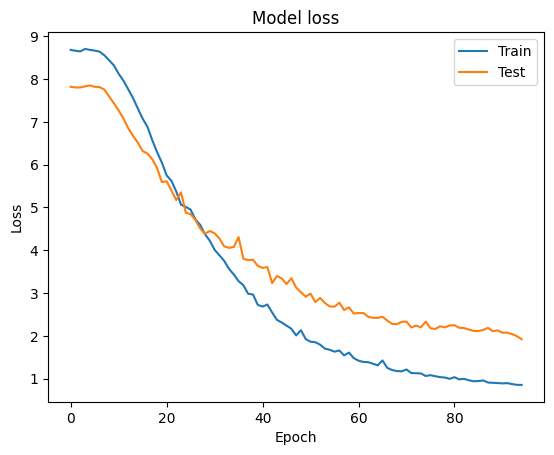

372/372 [==============================] - 2s 5ms/step - loss: 1.9199
Test Loss: 1.919915795326233


In [11]:
# Predict on the test set
y_pred = model.predict(X_test)

# Create a DataFrame with actual vs. predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})

# Print the results
print(results.head(10))
import matplotlib.pyplot as plt
results.head(1000)
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')


In [12]:
results.head(1000)

,Actual,Predicted
0,-1.066067,-1.156013
1,-0.235873,-4.198348
2,-0.087370,-0.245945
3,-0.268556,0.324178
4,-1.208073,0.140018
...,...,...
995,0.302670,0.414275
996,0.237345,0.985601
997,-1.068940,-0.392449
998,10.299434,9.814323


#  checking modals actual accuracey  for predicting the trend for future 10 minuts  

In [13]:
import pandas as pd

# Assuming the DataFrame 'result' is already defined with columns 'Actual' and 'Predicted'

# Create a new column 'Correct' that is True if both 'Actual' and 'Predicted' have the same sign, False otherwise
results['Correct'] = (results['Actual'] * results['Predicted'] > 0) | ((results['Actual'] == 0) & (results['Predicted'] == 0))

# Count the number of correct predictions
correct_predictions = results['Correct'].sum()

print(f"Number of correct predictions: {correct_predictions}")
print(f"Total number of instances: {len(results)}")
print(f"Accuracy: {correct_predictions / len(results) * 100:.2f}%")


Number of correct predictions: 9438
Total number of instances: 11899
Accuracy: 79.32%


In [ ]:
# Import the required modules
import pandas as pd
from google.colab import files

# Assume results is your DataFrame
# results = pd.DataFrame(...)

# Save the DataFrame to a CSV file
results.to_csv('results.csv', index=False)

# Download the CSV file
files.download('results.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>